In [10]:
import datetime

from model import *
from random_search import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Experiment 2: Model architecture tuning

In [12]:
# fixed parameters
lr = 0.1
momentum = 0.9
mini_batch_size = 50
num_epochs = 300

# variable parameters
num_hidden_min, num_hidden_max, num_hidden_n = 2,512, 9
num_layers_min, num_layers_max, num_layers_n = 2, 6, 5


# experiment parameters
seed = 0
num_trials = 45

#### Random search

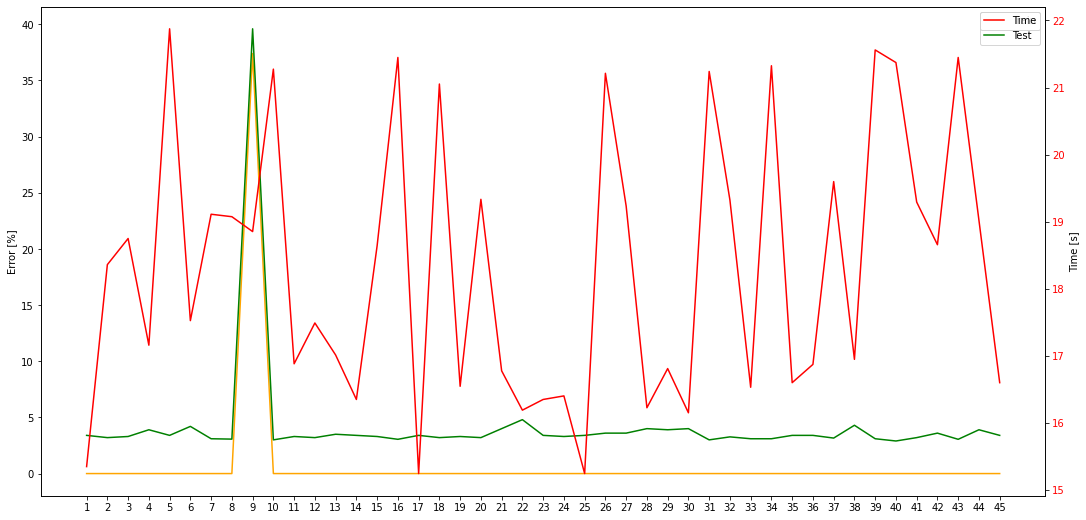

In [14]:
parameters_range = {'lr': (lr, lr, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 'fixed'),
                    'momentum': (momentum, momentum, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, 'discrete_loguniform_2'),
                    'num_layers': (num_layers_min, num_layers_max, 'discrete'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
parameters = random_hyperparameters(parameters_range,num_trials, seed)
results = random_search(parameters,offline=True)
visualize_experiment(results)

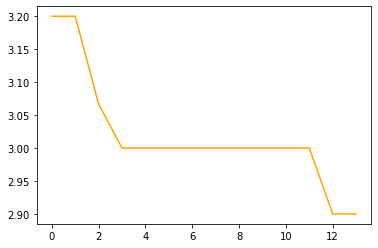

(range(0, 14),
 array([3.2       , 3.2       , 3.06666667, 3.        , 3.        ,
        3.        , 3.        , 3.        , 3.        , 3.        ,
        3.        , 3.        , 2.9       , 2.9       ]))

In [15]:
visualize_run_time(results)

#### Grid search

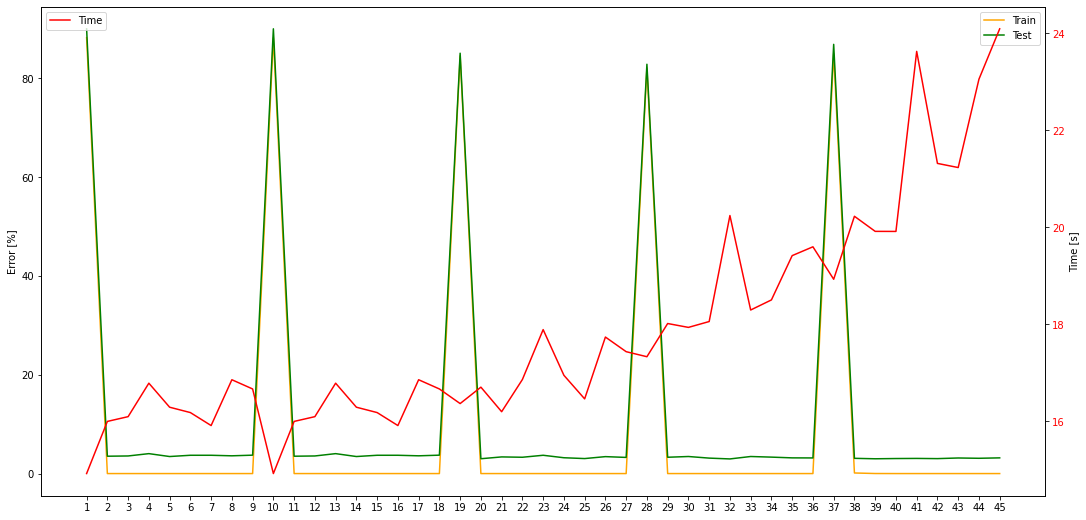

In [16]:
parameters_range = {'lr': (lr, lr, 1, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum, momentum, 1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, num_hidden_n, 'discrete_linspace'),
                    'num_layers': (num_layers_min, num_layers_max, num_layers_n, 'discrete_logspace_2'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
parameters = grid_hyperparameters(parameters_range)
results = grid_search(parameters,offline=True)
visualize_experiment(results)

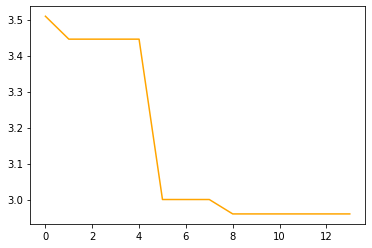

(range(0, 14),
 array([3.50909091, 3.44545455, 3.44545455, 3.44545455, 3.44545455,
        3.        , 3.        , 3.        , 2.96      , 2.96      ,
        2.96      , 2.96      , 2.96      , 2.96      ]))

In [17]:
visualize_run_time(results)

#### Bayesian optimisation

 C:\Users\Doo\anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


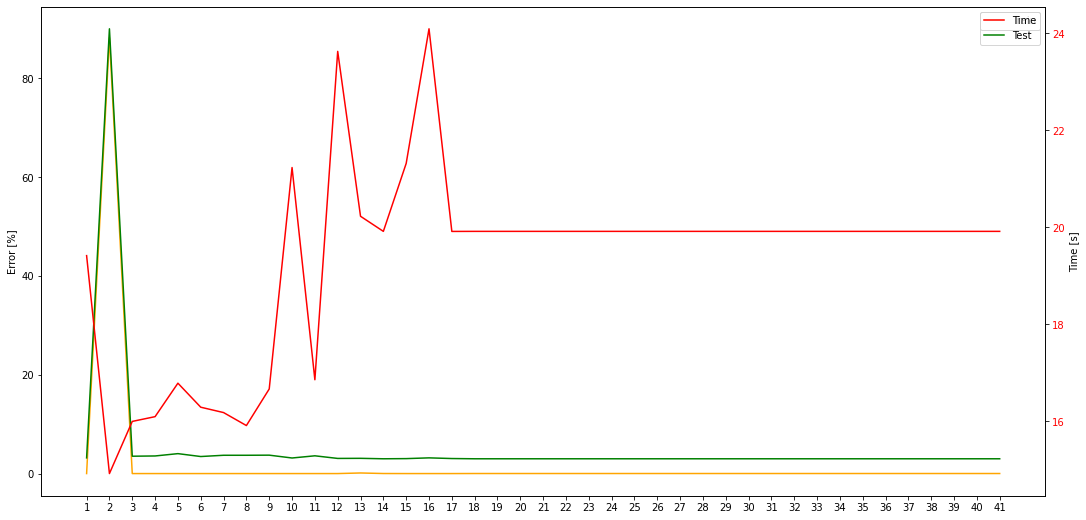

In [18]:
parameters_range = {'lr': (lr, lr, 1, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum, momentum, 1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, num_hidden_n, 'discrete_logspace_2''),
                    'num_layers': (num_layers_min, num_layers_max, num_layers_n, 'discrete_linspace'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
bo_optimizer = TuneBO( parameters_range=parameters_range,offline=True)
bo_optimizer.run(num_evals=40)
results=bo_optimizer.evaluation_history
visualize_experiment(results)

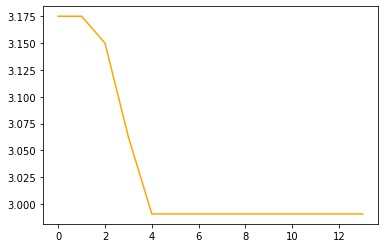

(range(0, 14),
 array([3.175     , 3.175     , 3.15      , 3.0625    , 2.99090909,
        2.99090909, 2.99090909, 2.99090909, 2.99090909, 2.99090909,
        2.99090909, 2.99090909, 2.99090909, 2.99090909]))

In [19]:
visualize_run_time(results)